# Tensorflow Regression

In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys

print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime

import random


In [5]:

DEBUG = True
seed = 1919


In [6]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [7]:

modeling_dataset_name = 'modeling_base_2022-11-20.csv'

df_modeling = pd.read_csv(f'{fileloc}/{modeling_dataset_name}')

print(df_modeling.shape)
print()
print(df_modeling.columns.values.tolist())


(541552, 56)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_dist', 'x_races_tot', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'x_races_tot_std_no', 'x_races_tot_norm', 'x_speed_prev_std_no', 'x_speed_prev_norm', 'x_speed_avg_std_no', 'x_speed_avg_norm', 'x_speed_min_std_no', 'x_speed_min_norm', 'x_speed_max_std_no', 'x_speed_max_norm', 'x_speed_range_std_no', 'x_speed_range_norm']


In [9]:

print(pd.DataFrame(df_modeling.isna().sum()).transpose())


   @id_DOG  DogName  y_runtime  RaceId  @id_RACE  Distance  RaceGrade  Track  Event_Dt  ft_sp  position  x_num_dogs  Winner_actual  Top3_actual  position_random  Winner_random  Top3_random  \
0        0        0          0       0         0         0          0      0         0      0         0           0              0            0                0              0            0   

   position_fasttrack  Winner_fastrack  Top3_fastrack  y_pos  x_dist  x_races_tot  x_no_prev_races  x_speed_prev  ...  G4  G3  G2  G1  Gmix  Gmas  Gmai  Gh  Gres  Gnov  Gsp  Gfin  RaceGrade_H1  \
0                   0                0              0      0       0            0                0             0  ...   0   0   0   0     0     0     0   0     0     0    0     0             0   

   x_races_tot_std_no  x_races_tot_norm  x_speed_prev_std_no  x_speed_prev_norm  x_speed_avg_std_no  x_speed_avg_norm  x_speed_min_std_no  x_speed_min_norm  x_speed_max_std_no  x_speed_max_norm  \
0                   0    

In [8]:

print(pd.DataFrame(df_modeling.dtypes).transpose)


<bound method DataFrame.transpose of                             0
@id_DOG                 int64
DogName                object
y_runtime             float64
RaceId                  int64
@id_RACE                int64
...                       ...
x_speed_min_norm      float64
x_speed_max_std_no      int64
x_speed_max_norm      float64
x_speed_range_std_no    int64
x_speed_range_norm    float64

[56 rows x 1 columns]>


In [10]:

df_modeling.head()


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,position,x_num_dogs,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_dist,x_races_tot,x_no_prev_races,x_speed_prev,...,G4,G3,G2,G1,Gmix,Gmas,Gmai,Gh,Gres,Gnov,Gsp,Gfin,RaceGrade_H1,x_races_tot_std_no,x_races_tot_norm,x_speed_prev_std_no,x_speed_prev_norm,x_speed_avg_std_no,x_speed_avg_norm,x_speed_min_std_no,x_speed_min_norm,x_speed_max_std_no,x_speed_max_norm,x_speed_range_std_no,x_speed_range_norm
0,108390981,DOLLY DOES IT,26.43,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,11.0,4,8,0,0,2.0,0,1,5.0,0,0,4,452,0,1,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,Mixed,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5
1,262316194,GO BEZZA,26.87,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,31.0,8,8,0,0,5.0,0,0,7.0,0,0,8,452,0,1,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,Mixed,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5
2,285758880,LITTLE MIA,26.81,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,21.0,7,8,0,0,4.0,0,0,6.0,0,0,7,452,0,1,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,Mixed,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5
3,296096035,MY NAMES SERG,26.13,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.8,2,8,0,1,1.0,1,1,2.0,0,1,2,452,0,1,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,Mixed,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5
4,327377954,WYNBURN BABE,26.01,626271182,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.0,1,8,1,1,3.0,0,1,1.0,1,1,1,452,0,1,0.0,...,0,0,0,0,1,0,0,0,0,0,0,0,Mixed,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5,1,0.5


In [11]:

df_modeling.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,ft_sp,position,x_num_dogs,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_dist,x_races_tot,x_no_prev_races,x_speed_prev,x_speed_avg,x_speed_min,x_speed_max,x_speed_range,x_speed_std,G5,G4,G3,G2,G1,Gmix,Gmas,Gmai,Gh,Gres,Gnov,Gsp,Gfin,x_races_tot_std_no,x_races_tot_norm,x_speed_prev_std_no,x_speed_prev_norm,x_speed_avg_std_no,x_speed_avg_norm,x_speed_min_std_no,x_speed_min_norm,x_speed_max_std_no,x_speed_max_norm,x_speed_range_std_no,x_speed_range_norm
count,5.415520e+05,541552.000000,5.415520e+05,5.415520e+05,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000
mean,4.525647e+08,24.427979,7.292605e+08,7.292605e+08,16.917818,4.150733,7.305492,0.140127,0.419843,4.152746,0.139857,0.419435,4.013938,0.145510,0.437633,4.150733,417.353562,18.734123,0.049223,16258.984439,16372.453807,15870.525764,16780.460082,909.891907,258.242292,0.401710,0.014992,0.003147,0.001078,0.004627,0.173540,0.021322,0.151780,0.103178,0.053805,0.037082,0.032721,0.042683,0.007656,0.003845,0.006821,0.003427,0.006795,0.003414,0.006795,0.003414,0.006795,0.003414,0.007471,0.003752
std,1.121930e+08,4.983891,5.831714e+07,5.831714e+07,20.995473,2.160054,0.950365,0.347119,0.493534,2.159921,0.346839,0.493467,2.088645,0.352614,0.496096,2.160054,83.856726,16.097282,0.216334,3723.162924,3460.682737,3376.122418,3576.492040,705.188284,201.697242,0.490244,0.121521,0.056006,0.032821,0.067868,0.378714,0.144456,0.358808,0.304191,0.225632,0.188964,0.177905,0.202141,0.087162,0.924927,0.082308,0.925198,0.082153,0.925206,0.082153,0.925206,0.082153,0.925206,0.086112,0.924985
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.260000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,259.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.474874,0.000000,-2.474803,0.000000,-2.474852,0.000000,-2.474788,0.000000,-2.474815,0.000000,-2.474874
25%,3.836042e+08,20.550000,6.802578e+08,6.802578e+08,4.200000,2.000000,7.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,350.000000,6.000000,0.000000,16795.865633,16881.052752,16306.695464,17237.442922,568.752099,186.539074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.712055,0.000000,-0.649582,0.000000,-0.672467,0.000000,-0.620811,0.000000,-0.679714,0.000000,-0.678904
50%,4.517679e+08,23.540000,7.293859e+08,7.293859e+08,8.700000,4.000000,8.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,400.000000,15.000000,0.000000,17084.890550,17102.524362,16601.453326,17513.513514,881.521254,250.024868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.099873,0.000000,0.163156,0.000000,0.067932,0.000000,0.177251,0.000000,0.056865,0.000000,-0.113772
75%,5.271657e+08,27.190000,7.792436e+08,7.792436e+08,20.600000,6.000000,8.000000,0.000000,1.000000,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,6.000000,461.000000,28.000000,0.000000,17347.670251,17287.706370,16842.105263,17747.193046,1177.824156,318.220158,1.000000,0.000000,0.0

In [12]:

print(datetime.now())

#df_modeling['year'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').year , axis = 1 )
#df_modeling['qtr'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').quarter , axis = 1 )

df_modeling['yearqtr'] = df_modeling.apply(lambda x : pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').year*100 + pd.to_datetime(x.Event_Dt, format = '%Y-%m-%d').quarter , axis = 1 )

print(datetime.now())


2022-11-20 01:31:08.503393
2022-11-20 01:32:31.099419


In [13]:

print(df_modeling.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_dist', 'x_races_tot', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'x_races_tot_std_no', 'x_races_tot_norm', 'x_speed_prev_std_no', 'x_speed_prev_norm', 'x_speed_avg_std_no', 'x_speed_avg_norm', 'x_speed_min_std_no', 'x_speed_min_norm', 'x_speed_max_std_no', 'x_speed_max_norm', 'x_speed_range_std_no', 'x_speed_range_norm', 'yearqtr']


In [14]:

#features = ['x_dist', 'x_no_prev_races', 'x_races_tot', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin']
features = ['x_no_prev_races', 'x_races_tot_norm', 'x_speed_prev_norm', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_speed_max_norm']
#label = 'y_runtime'
label = 'y_pos'


In [15]:

print( f' label : {label}, features : {features}')


 label : y_pos, features : ['x_no_prev_races', 'x_races_tot_norm', 'x_speed_prev_norm', 'x_speed_avg_norm', 'x_speed_min_norm', 'x_speed_max_norm']


In [16]:
# BASED ON SKLEARN

"""
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(df_modeling[features].values, df_modeling[label].values, test_size=0.30, random_state = seed)

print(datetime.now())
"""


'\nfrom sklearn.model_selection import train_test_split\n\n# Split data 70%-30% into training set and test set\nx_train, x_test, y_train, y_test = train_test_split(df_modeling[features].values, df_modeling[label].values, test_size=0.30, random_state = seed)\n\nprint(datetime.now())\n'

In [17]:

# BASED ON RANDOM SAMPLE

"""
samp_size = 0.30
df_rows = df_modeling.shape[0]
train_rows = int(df_rows*(1-samp_size))
test_rows = df_rows - train_rows

df_modeling['ids'] = np.arange(0,df_rows)

#print(df_rows, train_rows, test_rows)

#df.modeling_train =  random.uniform(0, 1)

df_train = df_modeling.sample(train_rows, random_state = seed)
df_train.loc[:,'ttflag'] = 'Train'
df_train_ids = df_train.ids.values.tolist()
#print(len(df_train_ids))

df_test = df_modeling[~df_modeling.ids.isin(df_train_ids)]
df_test.loc[:,'ttflag'] = 'Test'
#print(df_test.shape[0])

x_train = df_train[features].values
x_test = df_test[features].values

y_train = df_train[label].values
y_test = df_test[label].values

print()
print(datetime.now())
print()

print(f"x train : {x_train.shape}, x_test : {x_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")

print()
"""


'\nsamp_size = 0.30\ndf_rows = df_modeling.shape[0]\ntrain_rows = int(df_rows*(1-samp_size))\ntest_rows = df_rows - train_rows\n\ndf_modeling[\'ids\'] = np.arange(0,df_rows)\n\n#print(df_rows, train_rows, test_rows)\n\n#df.modeling_train =  random.uniform(0, 1)\n\ndf_train = df_modeling.sample(train_rows, random_state = seed)\ndf_train.loc[:,\'ttflag\'] = \'Train\'\ndf_train_ids = df_train.ids.values.tolist()\n#print(len(df_train_ids))\n\ndf_test = df_modeling[~df_modeling.ids.isin(df_train_ids)]\ndf_test.loc[:,\'ttflag\'] = \'Test\'\n#print(df_test.shape[0])\n\nx_train = df_train[features].values\nx_test = df_test[features].values\n\ny_train = df_train[label].values\ny_test = df_test[label].values\n\nprint()\nprint(datetime.now())\nprint()\n\nprint(f"x train : {x_train.shape}, x_test : {x_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")\n\nprint()\n'

In [16]:

# BASED ON DATES

df_train = df_modeling[ df_modeling.yearqtr <= 202201 ]
df_train.loc[:,'ttflag'] = 'Train'
print(df_train.shape[0])

#df_test = df_modeling[~df_modeling.ids.isin(df_train_ids)]
df_test = df_modeling[ df_modeling.yearqtr >= 202202 ]
df_test.loc[:,'ttflag'] = 'Test'
print(df_test.shape[0])

x_train = df_train[features].values
x_test = df_test[features].values

y_train = df_train[label].values
y_test = df_test[label].values

print()
print(datetime.now())
print()

print(f"x train : {x_train.shape}, x_test : {x_test.shape}, y_train : {y_train.shape}, y_test : {y_test.shape}")

print()



383978
157574

2022-11-20 01:33:52.816180

x train : (383978, 6), x_test : (157574, 6), y_train : (383978,), y_test : (157574,)



/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [17]:

print(df_train.ttflag.value_counts())
print(df_test.ttflag.value_counts())


Train    383978
Name: ttflag, dtype: int64
Test    157574
Name: ttflag, dtype: int64


In [39]:


print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(54,58):
   print(x_train[n], y_train[n])



Training Set: 383978, Test Set: 157574 

Sample of features and labels:
[0.         0.         0.46145223 0.46211809 0.46278333 0.46145223] 1
[0.         0.         0.32069485 0.32132533 0.32195547 0.32069485] 4
[0.         0.         0.39737077 0.39802052 0.39866978 0.39737077] 5
[ 1.         -1.73205081 -2.26535202 -2.26537148 -2.26538629 -2.26535202] 3


In [21]:
#!pip install --upgrade tensorflow

In [22]:
#!pip3 install keras --upgrade

In [19]:

print(datetime.now())

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import utils
from tensorflow.keras import optimizers


# Set random seed for reproducability
tf.random.set_seed(seed)

print(datetime.now())


2022-11-20 01:34:54.926328
2022-11-20 01:35:10.034803


In [24]:

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tf.__version__)

print(datetime.now())


Libraries imported.
Keras version: 2.3.0-tf
TensorFlow version: 2.2.0
2022-11-19 06:05:42.165082


In [25]:

# Creating Feature Normalisation

"""
#normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)

#normalizer.adapt(np.array(train_features))
normalizer.adapt(np.array(x_train))

print(normalizer.mean.numpy())
print()

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())
"""


"\n#normalizer = tf.keras.layers.Normalization(axis=-1)\nnormalizer = tf.keras.layers.experimental.preprocessing.Normalization(axis=-1)\n\n#normalizer.adapt(np.array(train_features))\nnormalizer.adapt(np.array(x_train))\n\nprint(normalizer.mean.numpy())\nprint()\n\nfirst = np.array(train_features[:1])\n\nwith np.printoptions(precision=2, suppress=True):\n  print('First example:', first)\n  print()\n  print('Normalized:', normalizer(first).numpy())\n"

In [26]:

#del model

#model = Sequential()
#model.add(Dense(units=1))
#model.add(Dense(hl, input_dim=hl, activation='relu'))

#model = tf.keras.Sequential([ layers.Dense(units=1) ])


In [20]:

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import backend as K
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError

def rmse(y_true, y_pred):
    return K.sqrt( K.mean( K.square(y_pred - y_true) ) )


In [22]:

del model

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])


In [23]:

model.compile(loss = MeanAbsoluteError(), optimizer=Adam(), metrics=[ MeanAbsoluteError() ])
#model.compile(loss = MeanSquaredError(), optimizer=Adam(), metrics=[ MeanSquaredError() ])
#model.compile(loss = MeanSquaredError(), optimizer = SGD(), metrics=[ MeanSquaredError() ])

#model.compile(loss=abse, optimizer=Adam(), metrics=[abse] )

model.fit(x_train, y_train, epochs=3)

print()
print(datetime.now())


2022-11-20 01:35:41.238601: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-11-20 01:35:41.496830: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-20 01:35:41.496867: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (compute-one-8c-32gb): /proc/driver/nvidia/version does not exist
2022-11-20 01:35:41.497859: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-11-20 01:35:41.566972: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2445430000 Hz
2022-11-20 01:35:41.567645: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2a00000b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022

Epoch 1/3
12000/12000 [==============================] - 11s 931us/step - loss: 1.7734 - mean_absolute_error: 1.7734
Epoch 2/3
12000/12000 [==============================] - 11s 930us/step - loss: 1.7595 - mean_absolute_error: 1.7596
Epoch 3/3
12000/12000 [==============================] - 11s 937us/step - loss: 1.7556 - mean_absolute_error: 1.7556

2022-11-20 01:36:16.898503


In [24]:

ms = model.summary()

print(ms)
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  1792      
_________________________________________________________________
dense_1 (Dense)              multiple                  65792     
_________________________________________________________________
dense_2 (Dense)              multiple                  32896     
_________________________________________________________________
dense_3 (Dense)              multiple                  129       
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________
None


In [25]:

predictions_train = model.predict(x_train)
predictions_train = np.ravel(predictions_train)

predictions_test = model.predict(x_test)
predictions_test = np.ravel(predictions_test)


In [26]:

print(rmse(y_train, predictions_train).numpy())

print(rmse(y_test, predictions_test).numpy())


2.1099786807449235
2.1050736889528374


In [27]:
# Getting the output dataset together

df_train['preds'] = predictions_train
df_test['preds'] = predictions_test

df_master = df_train.append(df_test)
print()

print(df_master.shape)
print()

print(df_master.columns.values.tolist())
print()



(541552, 59)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_dist', 'x_races_tot', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'x_races_tot_std_no', 'x_races_tot_norm', 'x_speed_prev_std_no', 'x_speed_prev_norm', 'x_speed_avg_std_no', 'x_speed_avg_norm', 'x_speed_min_std_no', 'x_speed_min_norm', 'x_speed_max_std_no', 'x_speed_max_norm', 'x_speed_range_std_no', 'x_speed_range_norm', 'yearqtr', 'ttflag', 'preds']



/tmp/ipykernel_14439/4144059021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['preds'] = predictions_train
/tmp/ipykernel_14439/4144059021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['preds'] = predictions_test


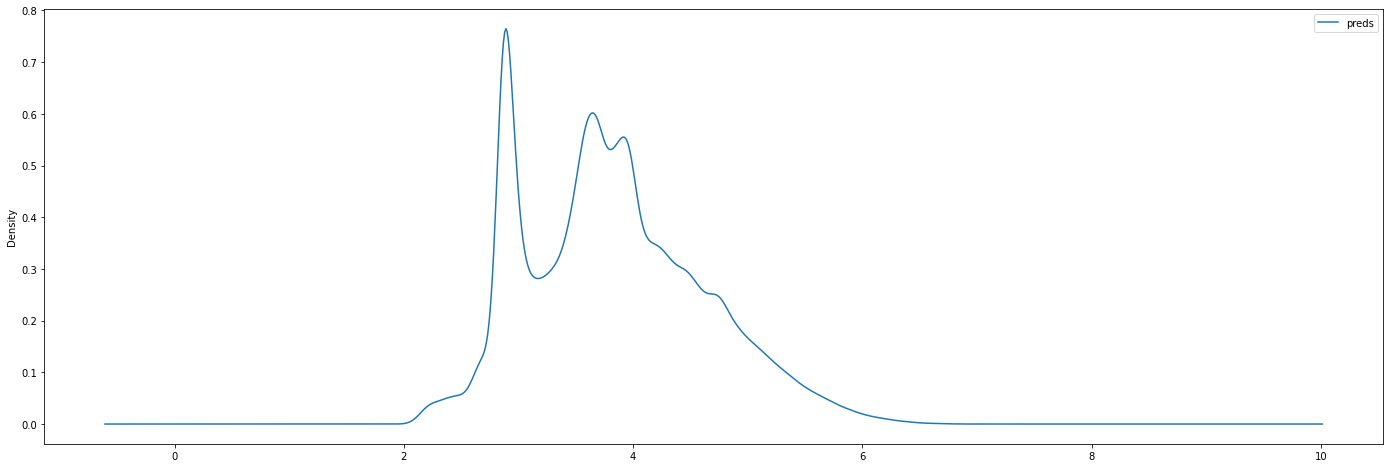

In [28]:

df_train['preds'].plot( kind='density', legend=True, figsize = (24,8) )


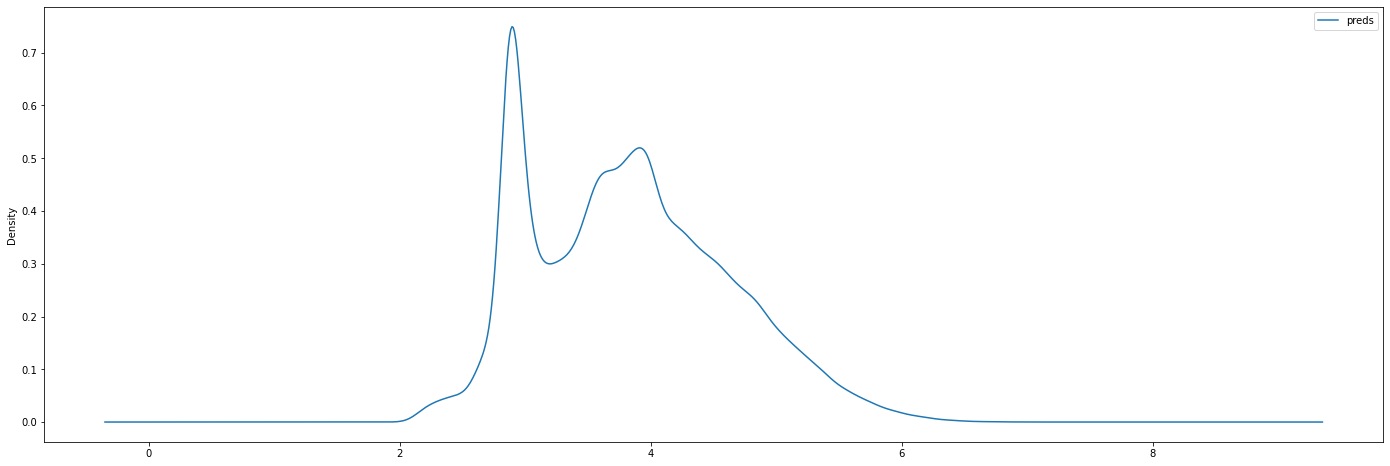

In [29]:

df_test['preds'].plot( kind='density', legend=True, figsize = (24,8) )


In [33]:

#pd.DataFrame(df_test['preds'].value_counts()).head()
#pd.DataFrame(df_test['preds'].value_counts()).shape


(152755, 1)

In [72]:
# Preparing the Datset for Export

In [34]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_for_drop = ['year','qtr']
cols_for_drop = []

todaydt = datetime.now().date()
pred_exp_fname = f'predictions_dataset_{todaydt}.csv'

exp_pred_ds = df_master.drop(columns = cols_for_drop)


In [35]:

print(exp_pred_ds.columns.values.tolist())


['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'position', 'x_num_dogs', 'Winner_actual', 'Top3_actual', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'y_pos', 'x_dist', 'x_races_tot', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'G5', 'G4', 'G3', 'G2', 'G1', 'Gmix', 'Gmas', 'Gmai', 'Gh', 'Gres', 'Gnov', 'Gsp', 'Gfin', 'RaceGrade_H1', 'x_races_tot_std_no', 'x_races_tot_norm', 'x_speed_prev_std_no', 'x_speed_prev_norm', 'x_speed_avg_std_no', 'x_speed_avg_norm', 'x_speed_min_std_no', 'x_speed_min_norm', 'x_speed_max_std_no', 'x_speed_max_norm', 'x_speed_range_std_no', 'x_speed_range_norm', 'yearqtr', 'ttflag', 'preds']


In [36]:

exp_pred_ds.describe()


,@id_DOG,y_runtime,RaceId,@id_RACE,ft_sp,position,x_num_dogs,Winner_actual,Top3_actual,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,y_pos,x_dist,x_races_tot,x_no_prev_races,x_speed_prev,x_speed_avg,x_speed_min,x_speed_max,x_speed_range,x_speed_std,...,G3,G2,G1,Gmix,Gmas,Gmai,Gh,Gres,Gnov,Gsp,Gfin,x_races_tot_std_no,x_races_tot_norm,x_speed_prev_std_no,x_speed_prev_norm,x_speed_avg_std_no,x_speed_avg_norm,x_speed_min_std_no,x_speed_min_norm,x_speed_max_std_no,x_speed_max_norm,x_speed_range_std_no,x_speed_range_norm,yearqtr,preds
count,5.415520e+05,541552.000000,5.415520e+05,5.415520e+05,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,...,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000,541552.000000
mean,4.525647e+08,24.427979,7.292605e+08,7.292605e+08,16.917818,4.150733,7.305492,0.140127,0.419843,4.152746,0.139857,0.419435,4.013938,0.145510,0.437633,4.150733,417.353562,18.734123,0.049223,16258.984439,16372.453807,15870.525764,16780.460082,909.891907,258.242292,...,0.003147,0.001078,0.004627,0.173540,0.021322,0.151780,0.103178,0.053805,0.037082,0.032721,0.042683,0.007656,0.003845,0.006821,0.003427,0.006795,0.003414,0.006795,0.003414,0.006795,0.003414,0.007471,0.003752,202145.009384,3.830354
std,1.121930e+08,4.983891,5.831714e+07,5.831714e+07,20.995473,2.160054,0.950365,0.347119,0.493534,2.159921,0.346839,0.493467,2.088645,0.352614,0.496096,2.160054,83.856726,16.097282,0.216334,3723.162924,3460.682737,3376.122418,3576.492040,705.188284,201.697242,...,0.056006,0.032821,0.067868,0.378714,0.144456,0.358808,0.304191,0.225632,0.188964,0.177905,0.202141,0.087162,0.924927,0.082308,0.925198,0.082153,0.925206,0.082153,0.925206,0.082153,0.925206,0.086112,0.924985,49.218587,0.781646
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,0.260000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,259.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.474874,0.000000,-2.474803,0.000000,-2.474852,0.000000,-2.474788,0.000000,-2.474815,0.000000,-2.474874,202101.000000,2.047763
25%,3.836042e+08,20.550000,6.802578e+08,6.802578e+08,4.200000,2.000000,7.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,350.000000,6.000000,0.000000,16795.865633,16881.052752,16306.695464,17237.442922,568.752099,186.539074,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.712055,0.000000,-0.649582,0.000000,-0.672467,0.000000,-0.620811,0.000000,-0.679714,0.000000,-0.678904,202102.000000,3.190755
50%,4.517679e+08,23.540000,7.293859e+08,7.293859e+08,8.700000,4.000000,8.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,400.000000,15.000000,0.000000,17084.890550,17102.524362,16601.453326,17513.513514,881.521254,250.024868,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.099873,0.000000,0.163156,0.000000,0.067932,0.000000,0.177251,0.000000,0.056865,0.000000,-0.113772,202104.000000,3.773507
75%,5.271657e+08,27.190000,7.792436e+08,7.792436e+08,20.600000,6.000000,8.000000,0.000000,1.000000,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,6.000000,461.000000,28.000000,0.000000,17347.670251,17287.706370,16842.105263,

In [35]:
# Check Preds Before Export

In [38]:

exp_pred_ds.to_csv(f'{fileloc}/{pred_exp_fname}', index = False)


In [37]:

print("THE END")


THE END
